## estatデータに対し地理空間的分析 (R言語)

In [1]:
dir.create("library")

In [2]:
.libPaths("library")
install.packages('tidymodels')
install.packages("rgdal")
install.packages("spData")
install.packages("RColorBrewer")
install.packages("spgwr")
install.packages("akima")
install.packages("nlme")
install.packages("rgeos")
install.packages('glmnet')
install.packages('maptools')


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘prodlim’, ‘future’, ‘warp’, ‘iterators’, ‘lhs’, ‘plyr’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘foreach’, ‘GPfit’, ‘pROC’, ‘conflicted’, ‘dials’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘terra’, ‘raster’


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Installing package into ‘/content/library’
(as ‘lib’ is uns

In [3]:
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')
install.packages('sf')
install.packages("spdep")


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’, ‘deldir’, ‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’


Warning message in install.packages("spdep"):
“installation of package ‘spdep’ had non-zero exit status”


In [8]:
library(sf)
library(tidyverse)
#library(spdep)
library(glmnet)
library(rgeos)
library(maptools)
library(dplyr)

library(sp)
library(rgdal)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-3

Loading required package: sp

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.8.0-CAPI-1.13.1
and GEOS at installation 3.6.2-CAPI-1.10.2differ”
rgeos version: 0.5-9, (SVN revision 684)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired by the end of 2023,
plan transition to sf functions using GEOS at your earliest convenience.
 Linking to sp version: 1.4-6 
 Polygon checking: TRUE 


Checking rgeos availability: TRUE
Please note that 'maptools' will be retired by the end of 2023,
plan transition at your earliest convenience;
some functionality will be moved to 'sp'.



ERROR: ignored

In [5]:
system("apt-get install -y fonts-noto-cjk")

In [ ]:
tar("library.tar.gz", "library")

In [6]:
df <- read.csv("output_ori_minus.csv",header=T, encoding="UTF-8")
inout_n <- df$転出入数 / df$総人口 *1000
df <- cbind(df,inout_n)
# sapply(df, class)

# 1 Lasso

191 x 1 sparse Matrix of class "dgCMatrix"
                                                                s0
共働き世帯数                                          .           
完全失業者数                                          .           
非労働力人口女                                        .           
一般世帯数_総数                                       .           
一般世帯数_父子母子世帯                               .           
一般世帯数_３世代世帯                                 .           
婚姻件数                                              .           
離婚件数                                              .           
平均婚姻年齢_初婚の妻                                 .           
現に保護を受けた生活保護被保護実世帯数.世帯.          .           
要保護_準要保護児童生徒数合計                         .           
大学.短大数                                           .           
専修学校数                                            .           
大学.短大学生数                                       .           
専修学校生徒数                                        .           
女性の高等学校卒業

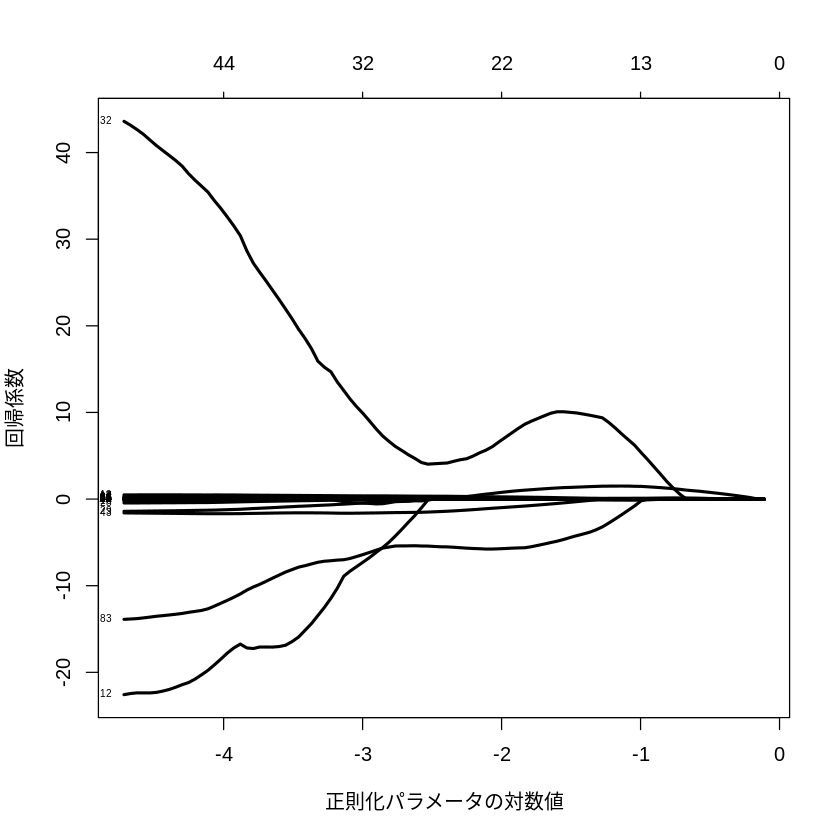

In [9]:
df_out <- subset(df, (inout_code == 12 & sex_code == 2 & year == 2015 & age_code == 25))
X <- as.matrix(df_out[,13:203])
y <- df_out[,204]
res <- glmnet(x=X, y=y, alpha=0.5)#, offset=pop)
plot(res, xvar="lambda", label=TRUE, xlab="正則化パラメータの対数値", 
     ylab="回帰係数", col="black", lwd=2.5)
res1 <- glmnet(x=X, y=y, alpha=0.5,lambda=0.6)
res1$beta

### 25−29歳女性の他都道府県からの流入数（2015年）については、「民営事業所数従業者３００人以上」の要因が最も強い。

191 x 1 sparse Matrix of class "dgCMatrix"
                                                                s0
共働き世帯数                                          .           
完全失業者数                                         -0.0095089398
非労働力人口女                                        .           
一般世帯数_総数                                       .           
一般世帯数_父子母子世帯                               .           
一般世帯数_３世代世帯                                 .           
婚姻件数                                              .           
離婚件数                                              .           
平均婚姻年齢_初婚の妻                                 0.2506116059
現に保護を受けた生活保護被保護実世帯数.世帯.          .           
要保護_準要保護児童生徒数合計                         .           
大学.短大数                                           .           
専修学校数                                            .           
大学.短大学生数                                       0.0023322286
専修学校生徒数                                        .           
女性の高等学校卒業

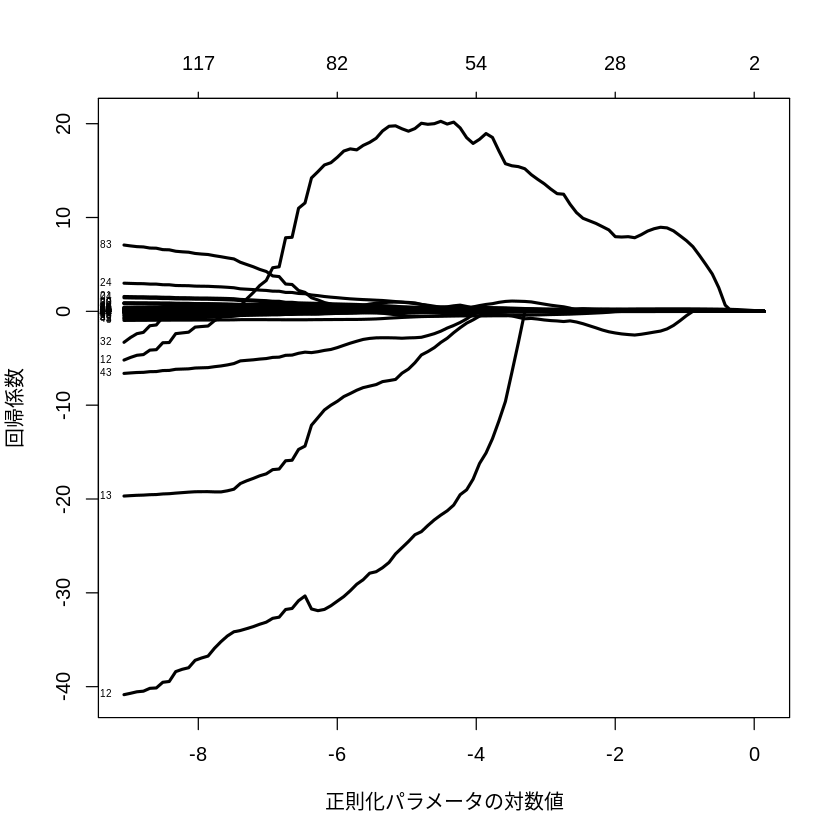

In [12]:
df_out <- subset(df, (inout_code == 12 & sex_code == 2))# & year == 2015 & age_code == 25))
X <- as.matrix(df_out[,13:203])
y <- df_out[,204]
res <- glmnet(x=X, y=y, alpha=0.5)#, offset=pop)
plot(res, xvar="lambda", label=TRUE, xlab="正則化パラメータの対数値", 
     ylab="回帰係数", col="black", lwd=2.5)
res1 <- glmnet(x=X, y=y, alpha=0.5,lambda=0.5)
res1$beta

### ３つの年齢階級（20-24歳、25−29歳、30-34歳）女性の他都道府県からの流入数（2010年と2015年）で見ると、「HHI指数_職種小分類_女性」の要因が最も強い。

# 2 空間データの例

In [15]:
install.packages("rgdal")
library(sp)
library(rgdal)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-28, (SVN revision 1158)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.0.0, March 1st, 2020, [PJ_VERSION: 700]
Path to PROJ shared files: /root/.local/share/proj:/usr/share/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-6
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.



In [16]:
m <- readOGR("20210616prefectures.shp")

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Japanese_Geodetic_Datum_2011 in Proj4 definition: +proj=longlat +ellps=GRS80 +no_defs”


OGR data source with driver: ESRI Shapefile 
Source: "/content/20210616prefectures.shp", layer: "20210616prefectures"
with 47 features
It has 5 fields


In [ ]:
class(m)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [ ]:
slotNames(m)

[1] "data"        "polygons"    "plotOrder"   "bbox"        "proj4string"

In [ ]:
View(m@data)
m@bbox
m@proj4string
m@polygons[[1]]@Polygons[[1]]@coords

,N03_001,N03_002,N03_003,N03_004,N03_007
,<chr>,<chr>,<chr>,<chr>,<chr>
0,静岡県,NA,静岡市,葵区,22101
1,群馬県,NA,NA,前橋市,10201
2,北海道,石狩振興局,札幌市,中央区,01101
3,愛知県,NA,名古屋市,千種区,23101
4,三重県,NA,NA,津市,24201
5,山梨県,NA,NA,甲府市,19201
6,山口県,NA,NA,下関市,35201
7,徳島県,NA,NA,徳島市,36201
8,新潟県,NA,新潟市,北区,15101


,min,max
x,122.93261,153.98668
y,20.42275,45.55724


Coordinate Reference System:
Deprecated Proj.4 representation: +proj=longlat +ellps=GRS80 +no_defs 
WKT2 2019 representation:
GEOGCRS["JGD2011",
    DATUM["Japanese Geodetic Datum 2011",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["Japan"],
        BBOX[17.09,122.38,46.05,157.65]],
    ID["EPSG",6668]] 

138.8437,34.60001
138.8438,34.60001
138.8438,34.60000
138.8438,34.60000
138.8438,34.59994
138.8438,34.59998
138.8438,34.60000
138.8437,34.60001


In [ ]:
prf <- substr(m@data$N03_007, 1, 2)
tail <- c("000")
prf <- paste(prf, tail, sep="")
head(prf)

[1] "22000" "10000" "01000" "23000" "24000" "19000"

In [17]:
df_out <- subset(df, (inout_code == 12 & sex_code == 2 & year == 2015 & age_code == 25))
m@data <- merge(x = df_out, y = m@data, by.x="地域", by.y="N03_001", all.x=T) 
m@data

地域,sex_code,sex,age_code,age,inout_code,inout,year,area_code,転出入数,⋯,熊本県,大分県,宮崎県,鹿児島県,沖縄県,inout_n,N03_002,N03_003,N03_004,N03_007
<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
三重県,2,女,25,25～29歳,12,転入,2015,24000,5718,⋯,NA,NA,NA,NA,NA,3.148913,NA,NA,津市,24201
京都府,2,女,25,25～29歳,12,転入,2015,26000,10276,⋯,NA,NA,NA,NA,NA,3.936632,NA,京都市,北区,26101
佐賀県,2,女,25,25～29歳,12,転入,2015,41000,3061,⋯,NA,NA,NA,NA,NA,3.675411,NA,NA,佐賀市,41201
兵庫県,2,女,25,25～29歳,12,転入,2015,28000,16743,⋯,NA,NA,NA,NA,NA,3.025042,NA,神戸市,東灘区,28101
北海道,2,女,25,25～29歳,12,転入,2015,1000,7582,⋯,NA,NA,NA,NA,NA,1.408840,石狩振興局,札幌市,中央区,01101
千葉県,2,女,25,25～29歳,12,転入,2015,12000,26371,⋯,NA,NA,NA,NA,NA,4.237894,NA,千葉市,中央区,12101
和歌山県,2,女,25,25～29歳,12,転入,2015,30000,2326,⋯,NA,NA,NA,NA,NA,2.413917,NA,NA,和歌山市,30201
埼玉県,2,女,25,25～29歳,12,転入,2015,11000,29197,⋯,NA,NA,NA,NA,NA,4.018009,NA,さいたま市,西区,11101
大分県,2,女,25,25～29歳,12,転入,2015,44000,3575,⋯,NA,1,NA,NA,NA,3.065149,NA,NA,大分市,44201


In [18]:
m@data <- subset(m@data,select=c(area_code, sex_code, age_code, year, inout_code, inout_n,民営事業所数従業者３００人以上, 特化係数_就業者数女_Ｌ学術研究_専門_技術サービス業, HHI指数_職種小分類_女性, 平均婚姻年齢_初婚の妻, GGI総合))
m@data

,area_code,sex_code,age_code,year,inout_code,inout_n,民営事業所数従業者３００人以上,特化係数_就業者数女_Ｌ学術研究_専門_技術サービス業,HHI指数_職種小分類_女性,平均婚姻年齢_初婚の妻,GGI総合
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24000,2,25,2015,12,3.148913,0.08701087,0.6450918,0.06915315,28.9,0.6617911
2,26000,2,25,2015,12,3.936632,0.09653867,0.9902457,0.07357667,29.7,0.6816556
3,41000,2,25,2015,12,3.675411,0.06483901,0.5210689,0.06847792,28.9,0.6483511
4,28000,2,25,2015,12,3.025042,0.07895498,0.8411723,0.07442977,29.3,0.6687384
5,1000,2,25,2015,12,1.408840,0.06707876,0.7405832,0.06651962,29.3,0.6901460
6,12000,2,25,2015,12,4.237894,0.06765589,0.8320089,0.07563525,29.6,0.6573861
7,30000,2,25,2015,12,2.413917,0.04670089,0.6243629,0.07056222,28.7,0.6416595
8,11000,2,25,2015,12,4.018009,0.06949668,0.8110054,0.07364060,29.6,0.6357308
9,44000,2,25,2015,12,3.065149,0.05830214,0.6463732,0.06866641,29.0,0.6617676


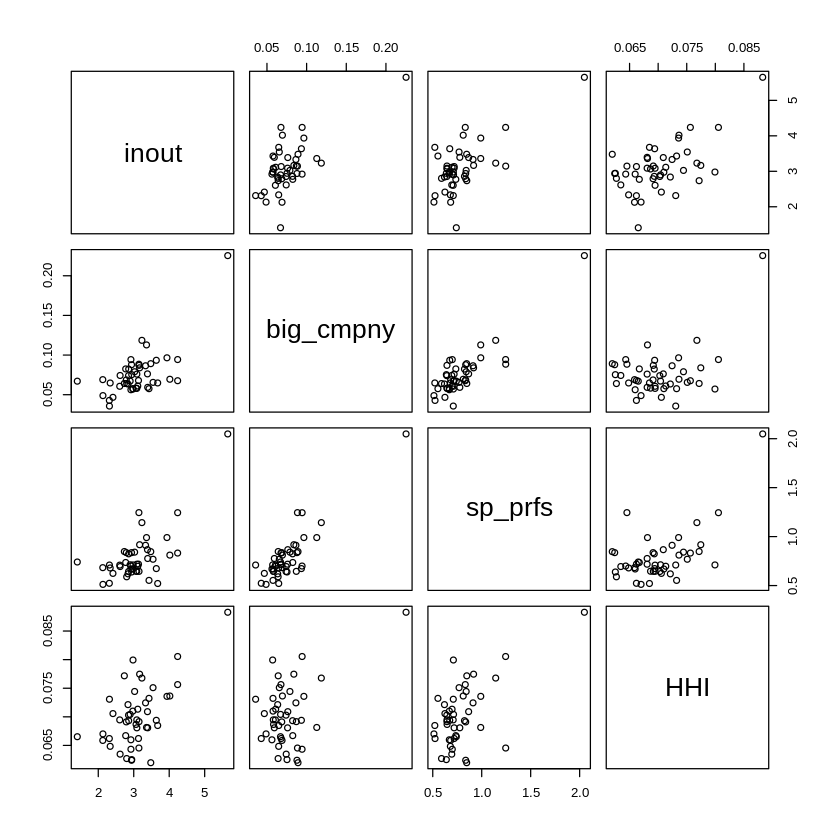

In [19]:
names(m@data)[6] <- "inout"
names(m@data)[7] <- "big_cmpny"
names(m@data)[8] <- "sp_prfs"
names(m@data)[9] <- "HHI"
names(m@data)[10] <- "marry_yr"
names(m@data)[11] <- "GGI"
d <- subset(m@data, (inout_code == 12 & sex_code == 2 & year == 2015 & age_code == 25))
d <- d[,6:9]
pairs(d)

In [20]:
res0 <- lm(inout ~big_cmpny + sp_prfs + HHI, data=d)
summary(res0)


Call:
lm(formula = inout ~ big_cmpny + sp_prfs + HHI, data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41300 -0.27296 -0.02819  0.25567  0.99702 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.9960     0.9853  -1.011  0.31776   
big_cmpny    12.0504     5.0230   2.399  0.02085 * 
sp_prfs       0.0326     0.6280   0.052  0.95883   
HHI          44.8794    15.9189   2.819  0.00725 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.458 on 43 degrees of freedom
Multiple R-squared:  0.5565,	Adjusted R-squared:  0.5255 
F-statistic: 17.98 on 3 and 43 DF,  p-value: 1.035e-07


In [50]:
AIC(res0)
BIC(res0)

[1] 65.79401

[1] 75.04475

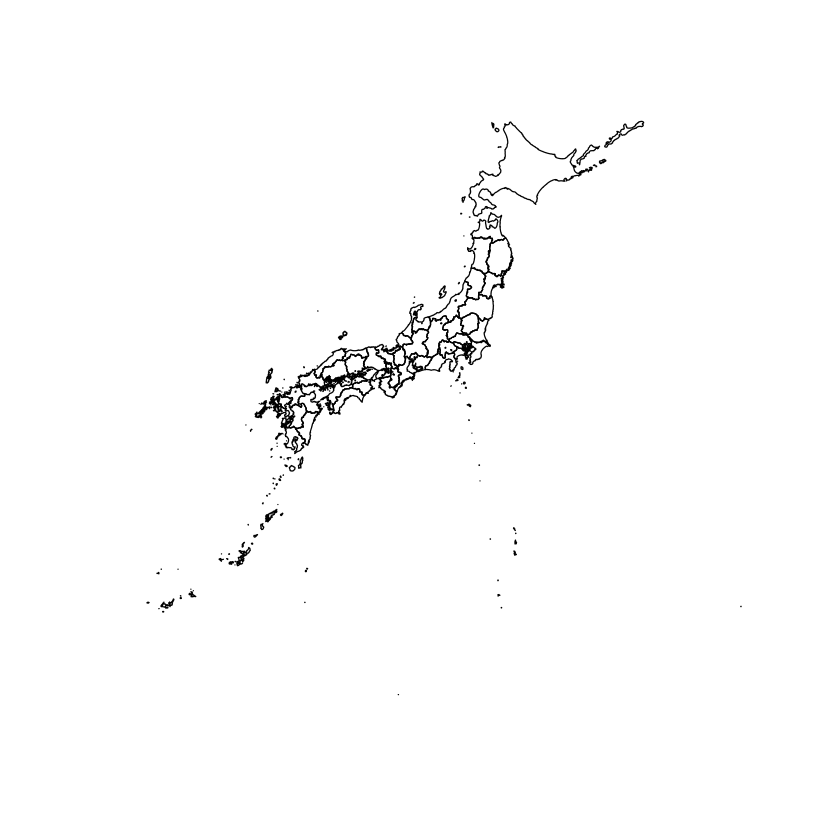

In [ ]:
 plot(m)

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


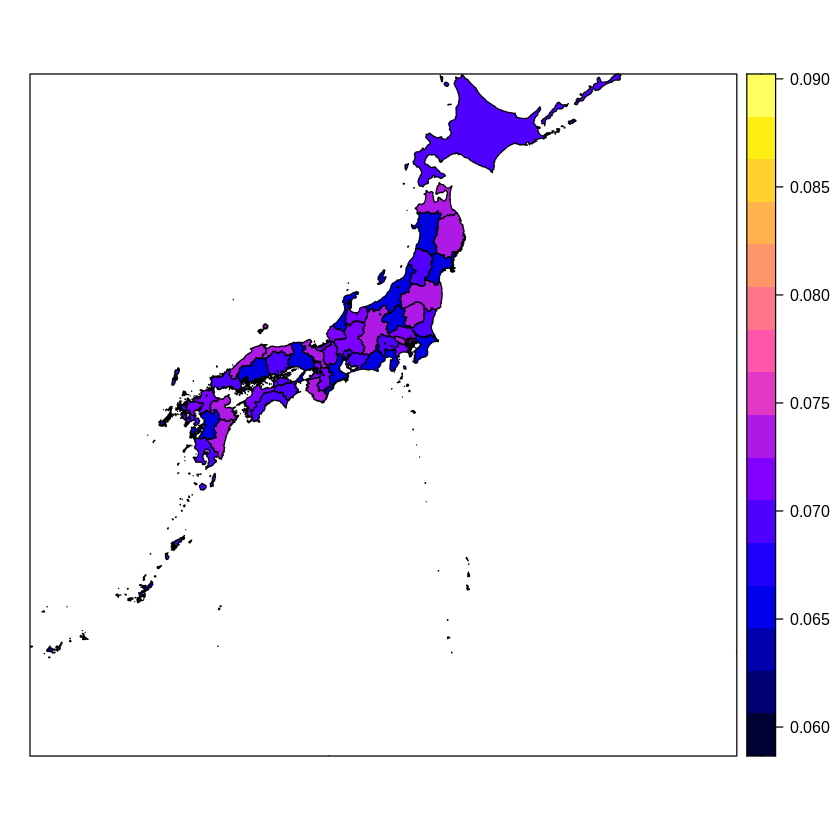

In [ ]:
# ハーフィンダール・ハーシュマン指数（職種の多様性指数）
spplot(m, zcol="HHI")

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


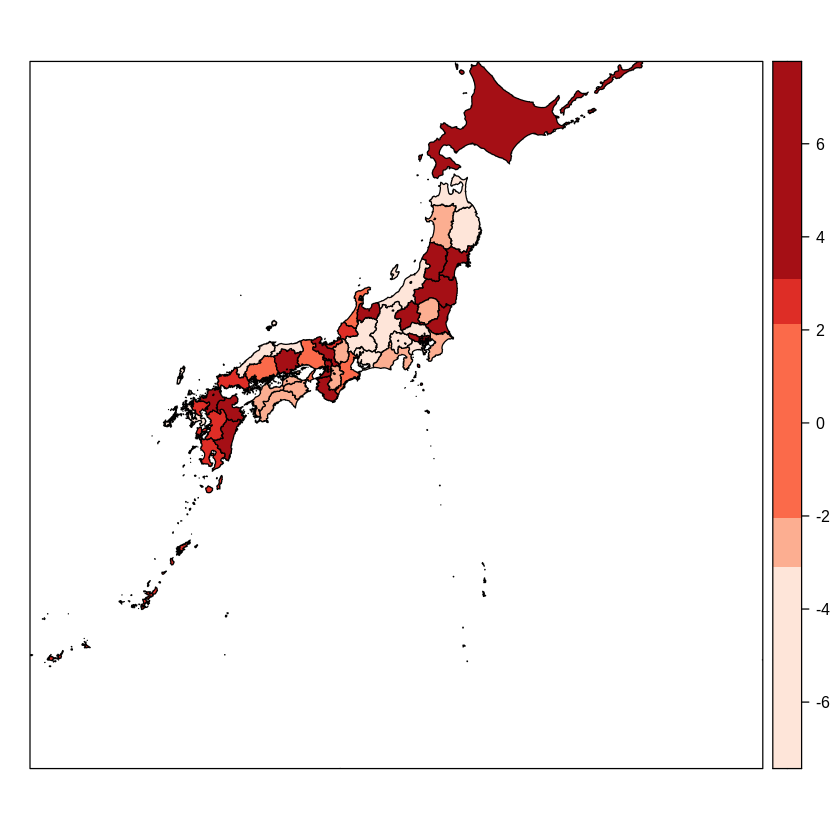

In [ ]:
# 県外からの転入出数
library(RColorBrewer)
brks <- quantile(m@data$inout, probs=0:5/5)
K <- length(brks)
brks[K] <- brks[K] + 1e-10
pals <- brewer.pal(n=K-1, name = "Reds")
spplot(m ,zcol="inout",
       at=brks, col.regions=pals)

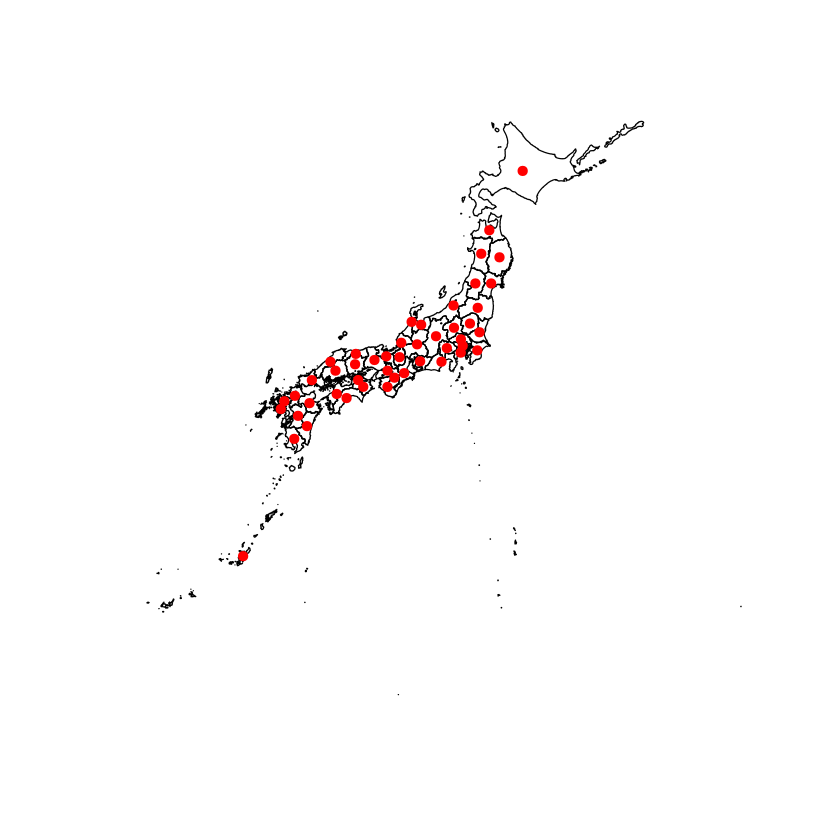

In [26]:
loc <- coordinates(m)
plot(m)
points(loc, col="red", pch=19)

# 3 地理的加重回帰

In [21]:
install.packages("terra")

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)



In [22]:
install.packages("libgdal")

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘libgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [24]:
install.packages("spDataLarge")

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘spDataLarge’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [27]:
library(spData)
library(spgwr)
bw <- gwr.sel(inout ~big_cmpny + sp_prfs + HHI, data=d, coords=loc)

Bandwidth: 8.544101 CV score: 10.20085 
Bandwidth: 13.81084 CV score: 10.28822 
Bandwidth: 5.289075 CV score: 10.31186 
Bandwidth: 9.78318 CV score: 10.22192 
Bandwidth: 7.300792 CV score: 10.19304 
Bandwidth: 7.195675 CV score: 10.19378 
Bandwidth: 7.605977 CV score: 10.1925 
Bandwidth: 7.964309 CV score: 10.19428 
Bandwidth: 7.521899 CV score: 10.19243 
Bandwidth: 7.529459 CV score: 10.19243 
Bandwidth: 7.526777 CV score: 10.19243 
Bandwidth: 7.526736 CV score: 10.19243 
Bandwidth: 7.526695 CV score: 10.19243 
Bandwidth: 7.526736 CV score: 10.19243 


In [28]:
bw

[1] 7.526736

In [29]:
res.gwr <- gwr(inout ~big_cmpny + sp_prfs + HHI, data=d, coords=loc, bandwidth=bw, hatmatrix=TRUE)
res.gwr

Call:
gwr(formula = inout ~ big_cmpny + sp_prfs + HHI, data = d, coords = loc, 
    bandwidth = bw, hatmatrix = TRUE)
Kernel function: gwr.Gauss 
Fixed bandwidth: 7.526736 
Summary of GWR coefficient estimates at data points:
                  Min.   1st Qu.    Median   3rd Qu.      Max.  Global
X.Intercept. -1.554464 -1.138858 -1.015432 -0.915544 -0.716481 -0.9960
big_cmpny    11.005722 11.166005 11.377840 11.645400 15.268731 12.0504
sp_prfs      -0.519809  0.054903  0.173959  0.259518  0.347917  0.0326
HHI          43.673283 44.066307 44.351477 44.879258 48.181521 44.8794
Number of data points: 47 
Effective number of parameters (residual: 2traceS - traceS'S): 6.047391 
Effective degrees of freedom (residual: 2traceS - traceS'S): 40.95261 
Sigma (residual: 2traceS - traceS'S): 0.4545865 
Effective number of parameters (model: traceS): 5.183517 
Effective degrees of freedom (model: traceS): 41.81648 
Sigma (model: traceS): 0.4498664 
Sigma (ML): 0.4243346 
AICc (GWR p. 61, eq 2.33; p.

In [30]:
install.packages("geojsonio")
library(geojsonio)

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘geometries’, ‘jsonify’, ‘rapidjsonr’, ‘sfheaders’, ‘urltools’, ‘httpcode’, ‘protolite’, ‘lazyeval’, ‘geojsonsf’, ‘crul’, ‘V8’, ‘geojson’, ‘jqr’


Warning message in install.packages("geojsonio"):
“installation of package ‘protolite’ had non-zero exit status”
Warning message in install.packages("geojsonio"):
“installation of package ‘V8’ had non-zero exit status”
Warning message in install.packages("geojsonio"):
“installation of package ‘jqr’ had non-zero exit status”
Warning message in install.packages("geojsonio"):
“installation of package ‘geojson’ had non-zero exit status”
Warning message in install.packages("geojsonio"):
“installation of package ‘geojsonio’ had non-zero exit status”


ERROR: ignored

In [31]:
res.gwr$SDF

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spatial

            coordinates    sum.w X.Intercept. big_cmpny     sp_prfs      HHI
1  (138.3273, 35.02021) 38.77592   -0.9648540  11.15761  0.11743191 44.28082
2  (138.9823, 36.50751) 37.79732   -0.9118314  11.50707  0.05292420 43.98348
3  (142.5712, 43.38341) 19.54870   -0.7164807  15.26873 -0.51980948 44.35148
4   (137.212, 35.03725) 39.82440   -0.9914994  11.11448  0.14893671 44.31022
5  (136.3781, 34.51874) 39.94093   -1.0276471  11.04046  0.18182320 44.48526
6  (138.6085, 35.61541) 38.53469   -0.9429944  11.28411  0.09273537 44.15296
7   (131.554, 34.21135) 34.62741   -1.1980637  11.40350  0.28607504 45.24134
8  (134.2387, 33.92063) 38.71855   -1.1088269  11.08520  0.24001125 44.86495
9   (138.9559, 37.4843) 37.06031   -0.8868679  11.74234  0.01981285 43.80500
10  (140.2012, 35.5168) 35.78784   -0.9134465  11.41539  0.04317206 44.21471
11 (134.8247, 35.09413) 39.72896   -1.0576734  11.13348  0.20894919 44.48167
12  (136.768, 36.76713) 39.54601   -0.9557757  11.37344  0.11864982 43.92678

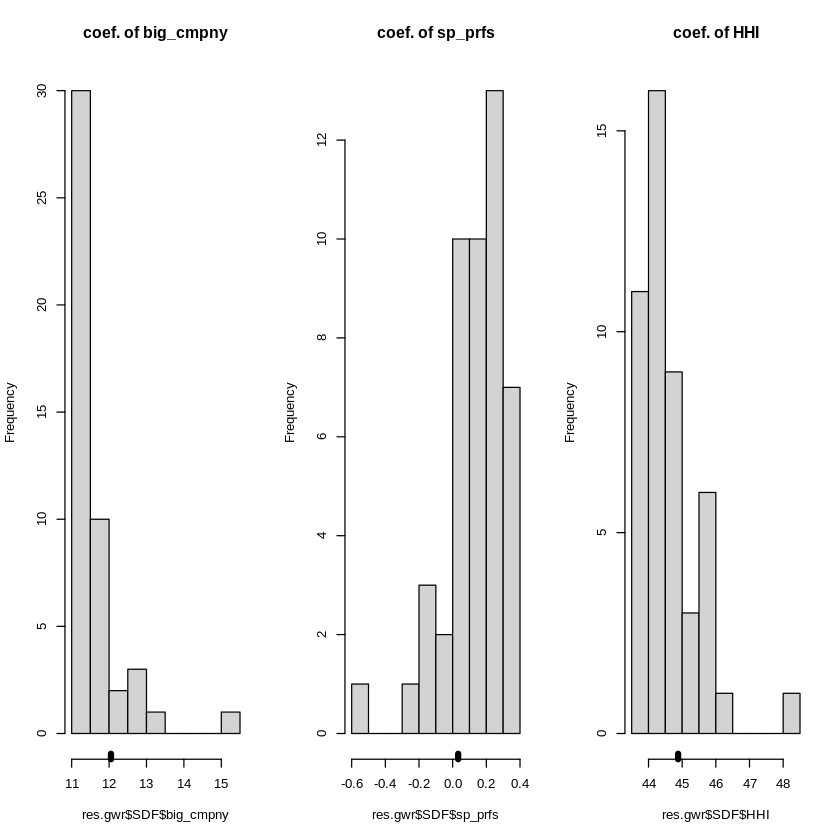

In [32]:
par(mfrow=c(1,3))
hist(res.gwr$SDF$big_cmpny, main = "coef. of big_cmpny")
rug(res0$coef[2], lwd=5)
hist(res.gwr$SDF$sp_prfs, main = "coef. of sp_prfs")
rug(res0$coef[3], lwd=5)
hist(res.gwr$SDF$HHI, main = "coef. of HHI")
rug(res0$coef[4], lwd=5)

### HHI係数の分布（空間加重回帰）

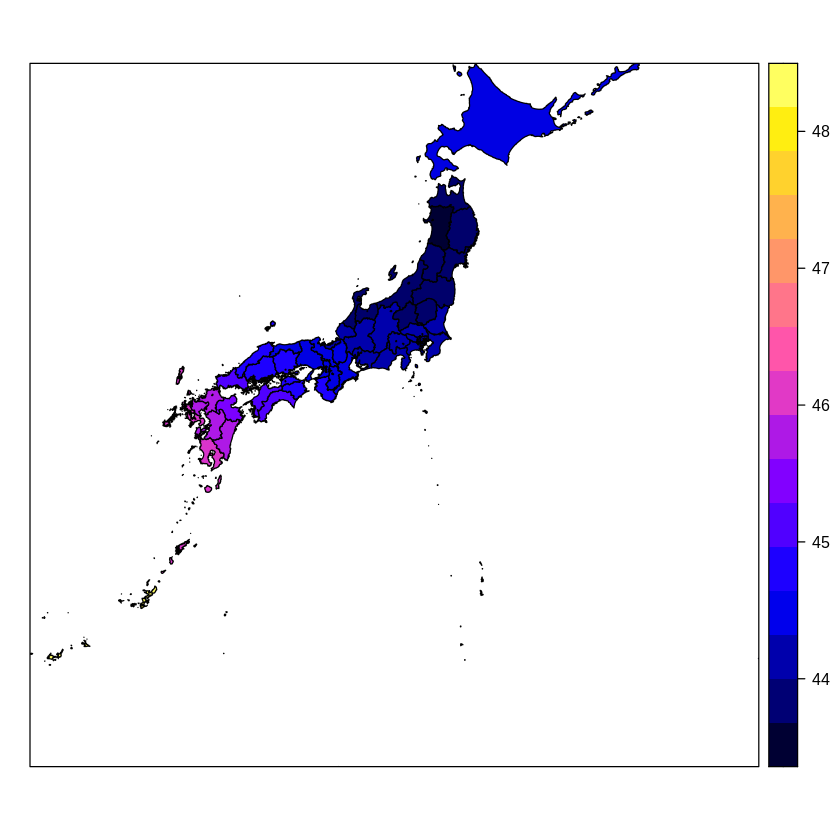

In [33]:
m@data$est.HHI <- res.gwr$SDF$HHI
spplot(m, zcol="est.HHI")

Warning message in data.frame(..., check.names = FALSE):
“row names were found from a short variable and have been discarded”


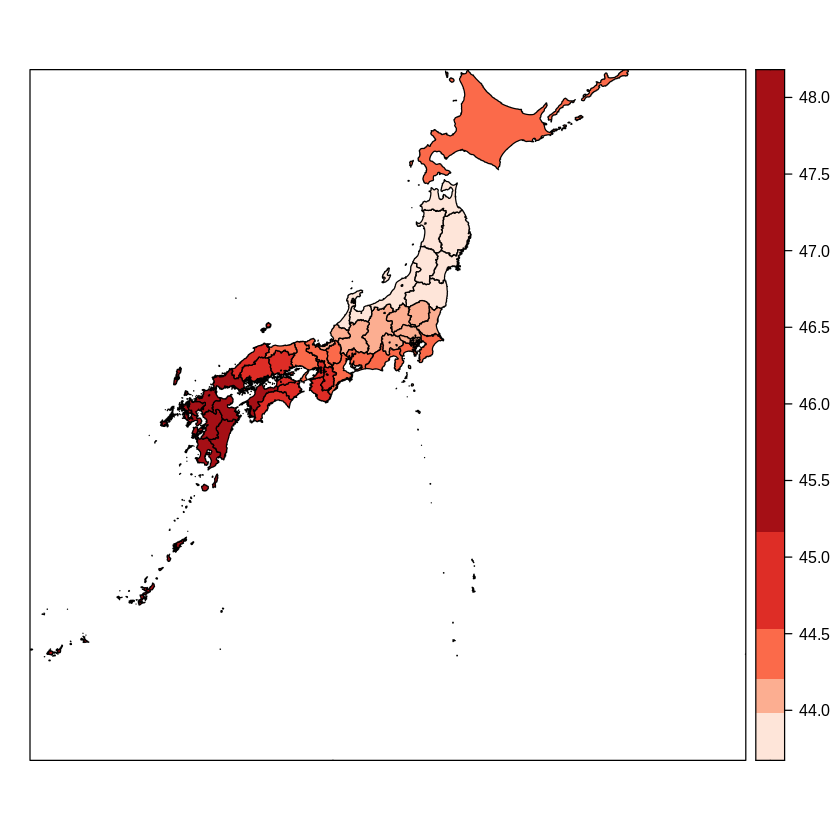

In [ ]:
m@data$est.HHI <- res.gwr$SDF$HHI
brks <- quantile(m@data$est.HHI, probs=0:5/5)
K <- length(brks)
brks[K] <- brks[K] + 1e-10
pals <- brewer.pal(n=K-1, name = "Reds")
spplot(m ,zcol="est.HHI",
       at=brks,col.regions=pals)

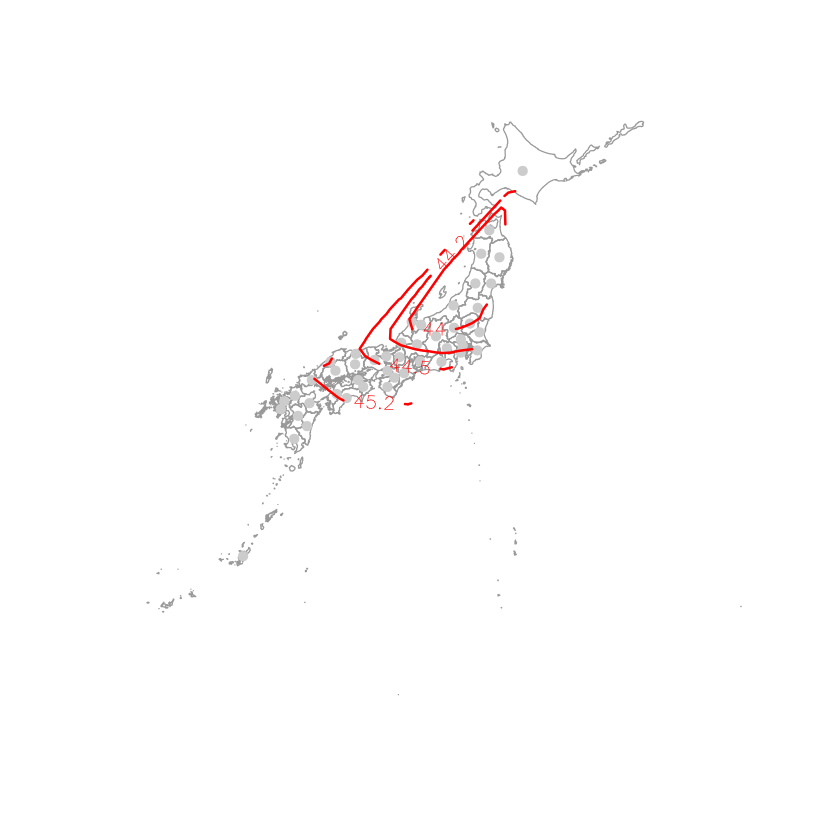

In [ ]:
library(akima)
u <- loc[,1]
v <- loc[,2]
z <- res.gwr$SDF$HHI
contour.INC <- interp(u, v, z, linear=TRUE)
plot(m,border="gray60")
points(u,v,pch=19,col="gray80")
at <- round(quantile(z, probs = 1:4/5),1)
contour(contour.INC, add=TRUE, col="red", levels = at, labcex=1, lwd=2)

### 300人以上事業所数係数の分布（空間加重回帰）

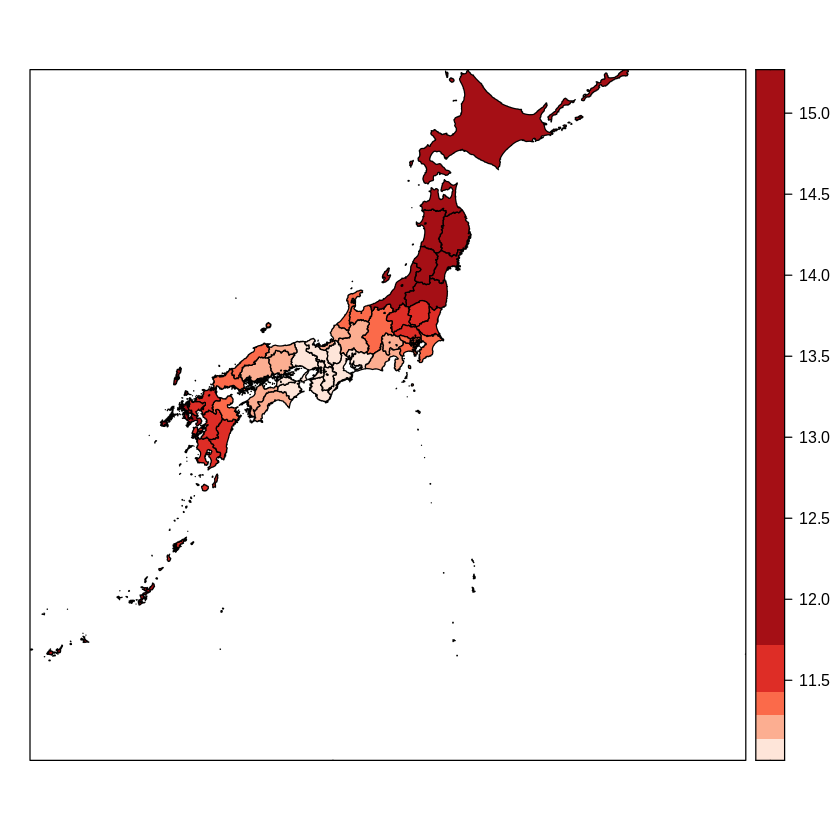

In [51]:
m@data$est.big_cmpny <- res.gwr$SDF$big_cmpny
brks <- quantile(m@data$est.big_cmpny, probs=0:5/5)
K <- length(brks)
brks[K] <- brks[K] + 1e-10
pals <- brewer.pal(n=K-1, name = "Reds")
spplot(m ,zcol="est.big_cmpny",
       at=brks,col.regions=pals)

# 4 線形な空間変化係数

In [34]:
u <- loc[,1]
v <- loc[,2]
res1 <- lm(inout~u*v*(big_cmpny + sp_prfs + HHI), data=d)
summary(res1)


Call:
lm(formula = inout ~ u * v * (big_cmpny + sp_prfs + HHI), data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.35434 -0.19159  0.02193  0.20847  0.94214 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)   -2.095e+02  8.522e+02  -0.246    0.807
u              1.667e+00  6.104e+00   0.273    0.787
v              4.295e+00  2.537e+01   0.169    0.867
big_cmpny      1.966e+03  4.939e+03   0.398    0.693
sp_prfs       -2.435e+02  4.049e+02  -0.602    0.552
HHI            4.254e+03  1.412e+04   0.301    0.765
u:v           -3.562e-02  1.808e-01  -0.197    0.845
u:big_cmpny   -1.597e+01  3.644e+01  -0.438    0.664
u:sp_prfs      1.732e+00  2.943e+00   0.589    0.560
u:HHI         -3.058e+01  1.007e+02  -0.304    0.763
v:big_cmpny   -4.363e+01  1.419e+02  -0.307    0.761
v:sp_prfs      7.810e+00  1.182e+01   0.661    0.514
v:HHI         -1.190e+02  4.182e+02  -0.285    0.778
u:v:big_cmpny  3.666e-01  1.044e+00   0.351    0.728
u:v:sp_prfs

In [49]:
AIC(res1)
BIC(res1)

[1] 75.71523

[1] 107.1677

In [36]:
library(RColorBrewer)

### HHI係数の分布（空間変化係数）

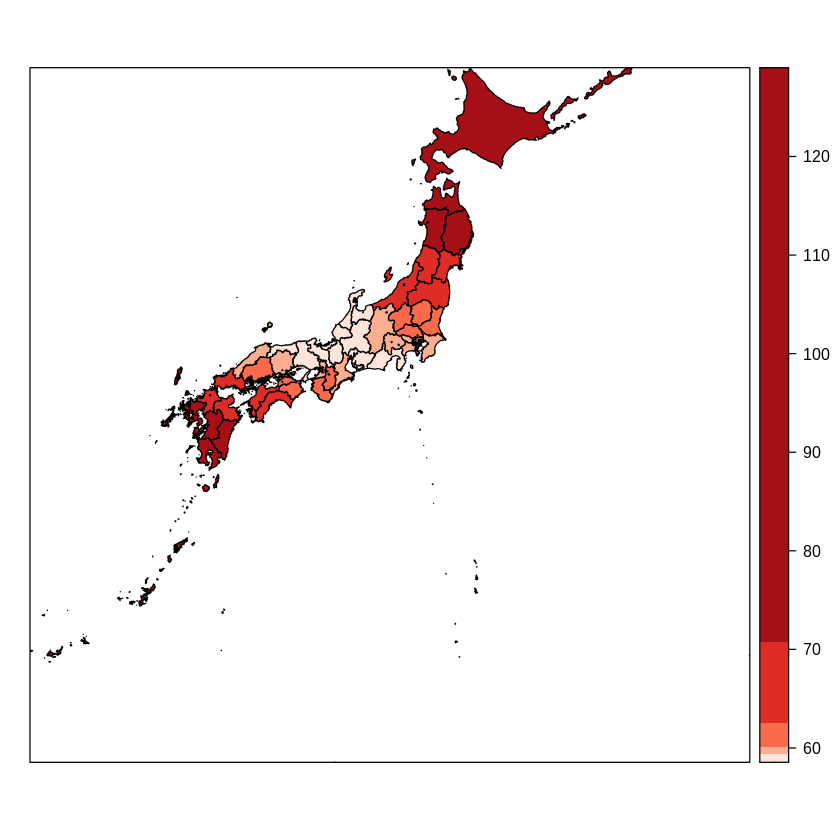

In [38]:
pos <- grep("HHI", names(res1$coefficients))
b <- res1$coefficients[pos]
X <- cbind(1,u,v,u*v)
m@data$est.HHI <- X %*% b
brks <- quantile(m@data$est.HHI, probs=0:5/5)

K <- length(brks)
brks[K] <- brks[K] + 1e-10
pals <- brewer.pal(n=K-1, name = "Reds")
spplot(m ,zcol="est.HHI",
       at=brks,col.regions=pals)

### 300人以上事業所数係数の分布（空間変化係数）

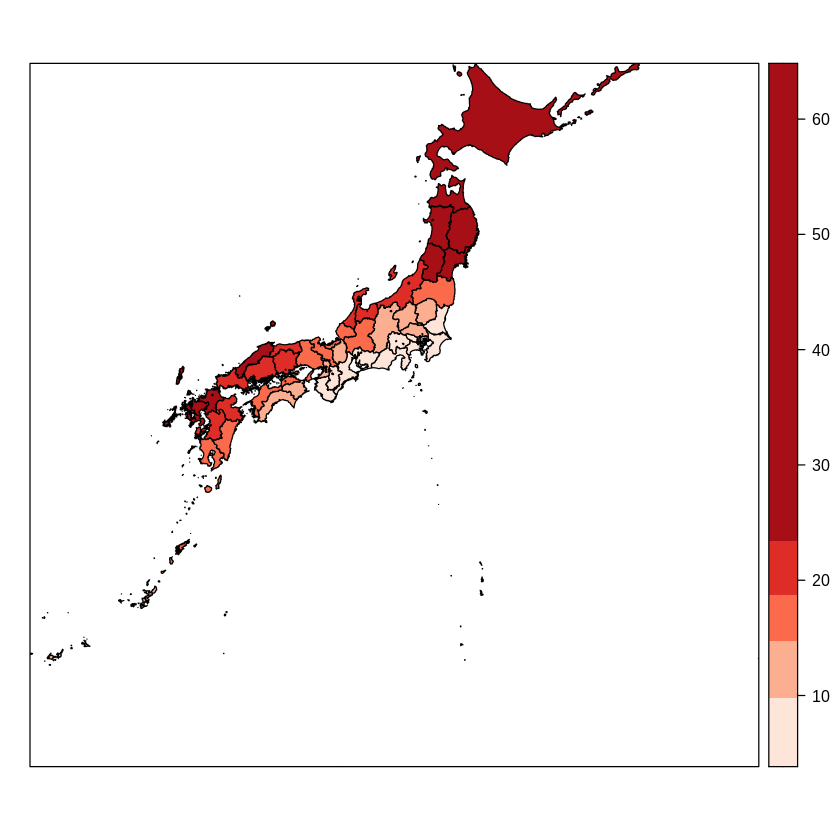

In [53]:
pos <- grep("big_cmpny", names(res1$coefficients))
b <- res1$coefficients[pos]
X <- cbind(1,u,v,u*v)
m@data$est.big_cmpny <- X %*% b
brks <- quantile(m@data$est.big_cmpny, probs=0:5/5)

K <- length(brks)
brks[K] <- brks[K] + 1e-10
pals <- brewer.pal(n=K-1, name = "Reds")
spplot(m ,zcol="est.big_cmpny",
       at=brks,col.regions=pals)

# 5 非線形な空間変化係数

In [40]:
n <- nrow(d); p <- 3; y <- d$inout; a.1 <- d$big_cmpny; a.2 <- d$HHI

In [41]:
#Xの作成（線形構造）
X.0 <- cbind(1,u,v)
q <- ncol(X.0)
X.1 <- a.1*X.0
X.2 <- a.2*X.0
X <- cbind(X.0,X.1,X.2)
colnames(X) <- 1:ncol(X)

In [42]:
#Zの作成（非線形構造）
k.u <- quantile(u,prob=0:3/4)#四分位範囲(75%まで、4つ)
k.v <- quantile(v,prob=0:3/4)

In [43]:
knots <- expand.grid(k.u,k.v)#16*2(uの四分位範囲4種類 * vの四分位範囲4種類 の組み合わせ)
r <- length(k.u)
s <- length(k.v)
rs <- r*s#4*4=16
Zu <- outer(u,knots[,1],"-"); Zu <- Zu*(Zu>0)#外積、47*16（u*u四分位）、非負値の場合2乗
Zv <- outer(v,knots[,2],"-"); Zv <- Zv*(Zv>0)

In [44]:
Z.0 <- Zu*Zv# 空間の定数項(非線形)
colnames(Z.0) <- NULL
Z.1 <- a.1*Z.0# 空間のa1係数(非線形)
Z.2 <- a.2*Z.0# 空間のa2係数(非線形)
Z <- cbind(Z.0,Z.1,Z.2)

In [45]:
library(nlme)
# データのグループ化
group <- rep(1,length(y))
dg <- groupedData(y~-1+X|group,data=data.frame(y,X,Z,group))
#47*59
#(y,
#線形構造　X(47*9):1, u, v, a1, u*a1, v*a1, a2, u*a2, v*a2 
#非線形構造Z(47*48)座標の組み合わせ4*4 * （定数項+2変数) 
#group(47*1)

# 変量効果の分散構造の定義
pdIdents <- list(pdIdent(~Z.0-1),pdIdent(~Z.1-1),pdIdent(~Z.2-1)) # 混合効果モデルのあてはめ
res2 <- lme(y~-1+X,data=dg,random=list(group=pdBlocked(pdIdents)))
res2


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse




ERROR: ignored

In [46]:
pdIdent(~Z.0-1)

Uninitialized positive definite matrix structure of class pdIdent.

In [48]:
Z.0

0,88.39530,44.482494,17.922922,0.00000000,9.8935585,4.9786603,2.0060058,0.000000000,0.0000000,0.0000000,0.0000000,0.000000000,0.000000,0.0000000,0.0000000,0.0000000
1,110.37394,58.800486,27.607557,0.00000000,26.9133274,14.3377748,6.7317629,0.000000000,14.2046941,7.5673923,3.5529844,0.000000000,1.086295,0.5787117,0.2717123,0.0000000
2,246.78125,159.791987,107.178681,54.57998282,136.1474705,88.1561079,59.1297195,30.111390091,119.3011512,77.2480393,51.8132550,26.385532465,101.911655,65.9882610,44.2608851,22.5395417
3,79.04394,35.043380,8.430730,0.00000000,8.9869233,3.9842671,0.9585342,0.000000000,0.0000000,0.0000000,0.0000000,0.000000000,0.000000,0.0000000,0.0000000,0.0000000
4,67.55475,26.224842,1.227471,0.00000000,3.8117137,1.4797123,0.0692589,0.000000000,0.0000000,0.0000000,0.0000000,0.000000000,0.000000,0.0000000,0.0000000,0.0000000
5,97.13050,50.151950,21.738138,0.00000000,16.5003764,8.5197346,3.6928409,0.000000000,4.2227457,2.1803547,0.9450650,0.000000000,0.000000,0.0000000,0.0000000,0.0000000
6,27.74126,0.000000,0.000000,0.00000000,0.5225780,0.0000000,0.0000000,0.000000000,0.0000000,0.0000000,0.0000000,0.000000000,0.000000,0.0000000,0.0000000,0.0000000
7,46.63263,8.383452,0.000000,0.00000000,0.0000000,0.0000000,0.0000000,0.000000000,0.0000000,0.0000000,0.0000000,0.000000000,0.000000,0.0000000,0.0000000,0.0000000
8,120.85164,64.247005,30.011092,0.00000000,37.5906021,19.9838712,9.3348755,0.000000000,24.9123587,13.2438785,6.1864869,0.000000000,11.825330,6.2865677,2.9365845,0.0000000
9,110.45030,63.979687,35.873085,7.77428572,17.7609718,10.2882598,5.7685749,1.250144773,3.6470725,2.1126113,1.1845304,0.256707162,0.000000,0.0000000,0.0000000,0.0000000
10,59.04053,14.746951,0.000000,0.00000000,7.0587995,1.7631239,0.0000000,0.000000000,0.0000000,0.0000000,0.0000000,0.000000000,0.000000,0.0000000,0.0000000,0.0000000


### ランダム効果に用いる分散の正定値行列がうまく算出できないため、非線形の空間変化係数は諦めることとした。